# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | ambilobe
Processing Record 3 of Set 1 | cap-aux-meules
Processing Record 4 of Set 1 | manggar
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | sinnamary
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | taburi
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | san jose
Processing Record 17 of Set 1 | buribay
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | seminole
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record 22 of Set 1 

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,comodoro rivadavia,-45.8667,-67.5000,75.06,20,0,32.21,AR,2023-04-01 18:32:59
1,ambilobe,-13.2000,49.0500,74.23,95,95,3.40,MG,2023-04-01 18:37:03
2,cap-aux-meules,47.3821,-61.8597,33.85,86,100,12.66,CA,2023-04-01 18:37:03
3,manggar,-2.8833,108.2667,78.13,82,61,1.95,ID,2023-04-01 18:37:03
4,cape town,-33.9258,18.4232,67.12,80,0,14.97,ZA,2023-04-01 18:35:42


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,71.20,74,0,2.24,BR,2023-03-31 20:41:57
1,liverpool,53.4106,-2.9779,51.62,89,75,5.75,GB,2023-03-31 20:50:27
2,teknaf,20.8624,92.3058,73.81,92,11,2.35,BD,2023-03-31 20:50:28
3,luderitz,-26.6481,15.1594,62.01,81,0,3.56,NaN,2023-03-31 20:42:39
4,komsomolskiy,40.4272,71.7189,59.72,58,98,9.22,UZ,2023-03-31 20:50:28


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

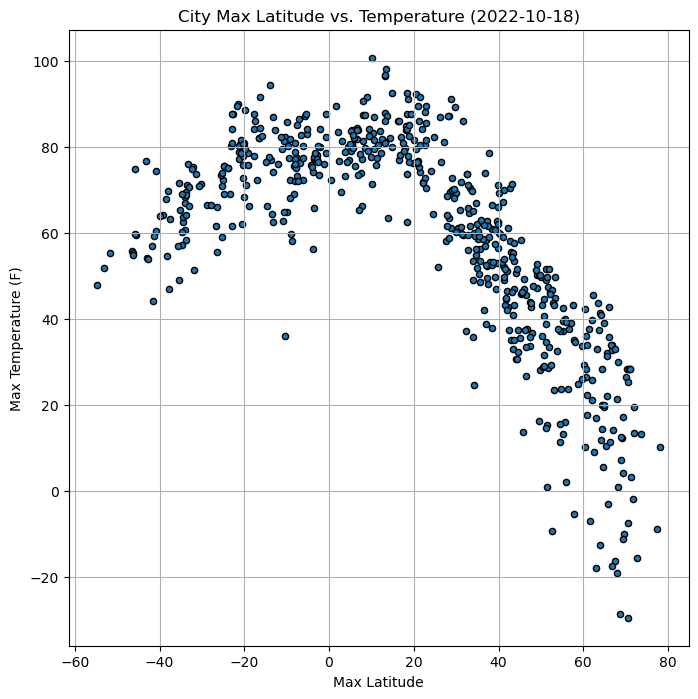

In [72]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Max Temp', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Max Latitude")
plt.ylabel("Max Temperature (F)")


# Save the figure
plt.savefig("output_data_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

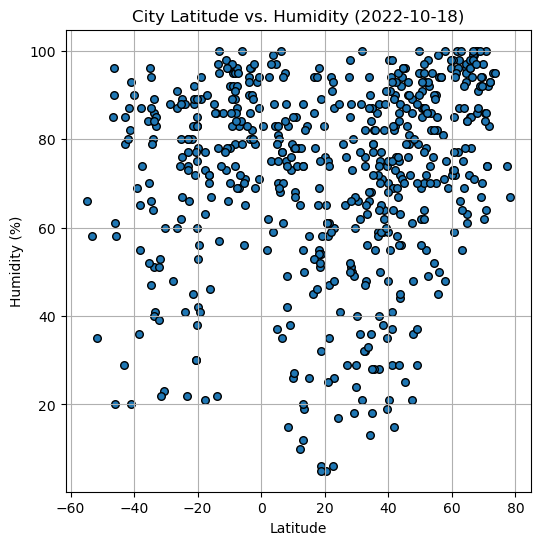

In [75]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Humidity', marker='o', grid=True, figsize=(6,6), edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data_Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

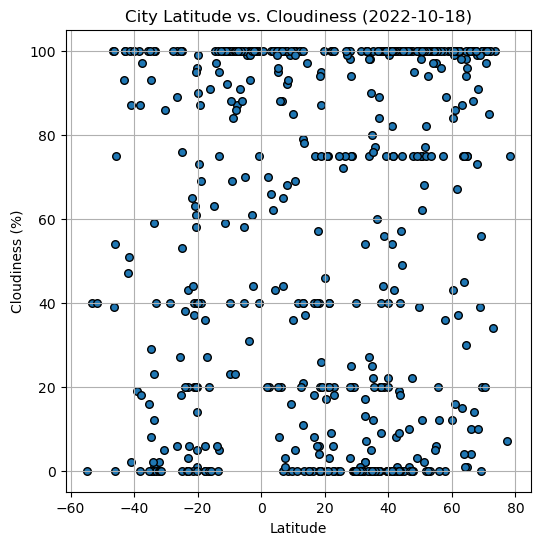

In [76]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Cloudiness', marker='o', grid=True, figsize=(6,6), edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data_Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

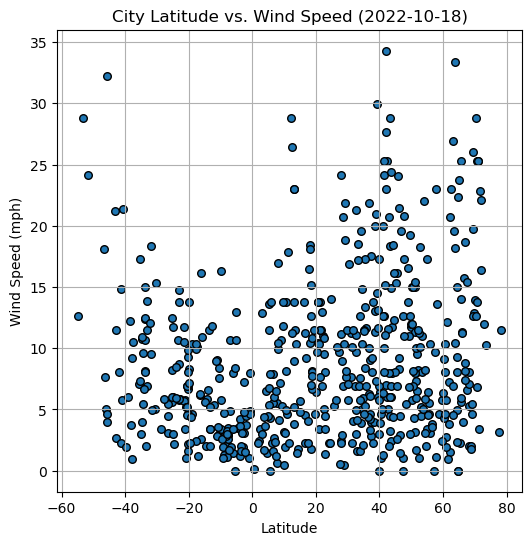

In [77]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Wind Speed', marker='o', grid=True, figsize=(6,6), edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


# Save the figure
plt.savefig("output_data_Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,cap-aux-meules,47.3821,-61.8597,33.85,86,100,12.66,CA,2023-04-01 18:37:03
5,sinnamary,5.3833,-52.9500,80.87,70,95,11.48,GF,2023-04-01 18:37:04
8,upernavik,72.7868,-56.1549,-15.65,95,34,11.97,GL,2023-04-01 18:37:04
9,albany,42.6001,-73.9662,70.41,58,0,5.01,US,2023-04-01 18:33:58
11,hilo,19.7297,-155.0900,76.24,83,100,4.61,US,2023-04-01 18:35:33


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,comodoro rivadavia,-45.8667,-67.5000,75.06,20,0,32.21,AR,2023-04-01 18:32:59
1,ambilobe,-13.2000,49.0500,74.23,95,95,3.40,MG,2023-04-01 18:37:03
3,manggar,-2.8833,108.2667,78.13,82,61,1.95,ID,2023-04-01 18:37:03
4,cape town,-33.9258,18.4232,67.12,80,0,14.97,ZA,2023-04-01 18:35:42
6,cidreira,-30.1811,-50.2056,71.35,60,86,15.32,BR,2023-04-01 18:37:04


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.77


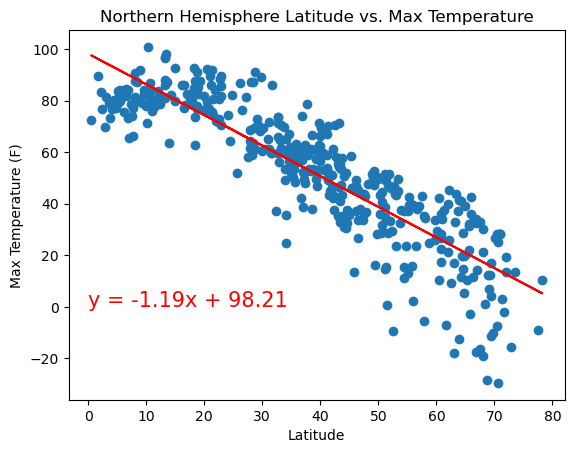

In [93]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere Latitude vs. Max Temperature")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.32


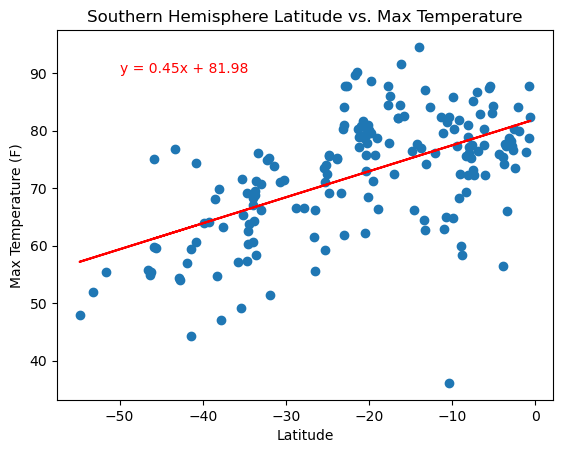

In [100]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-50,90),fontsize=10,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere Latitude vs. Max Temperature")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** Northern hem is more concentrated while the southern is more spread out. Line of regression is more steady in the southern hem compared to a steeper slope for the norhtern hem.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.10


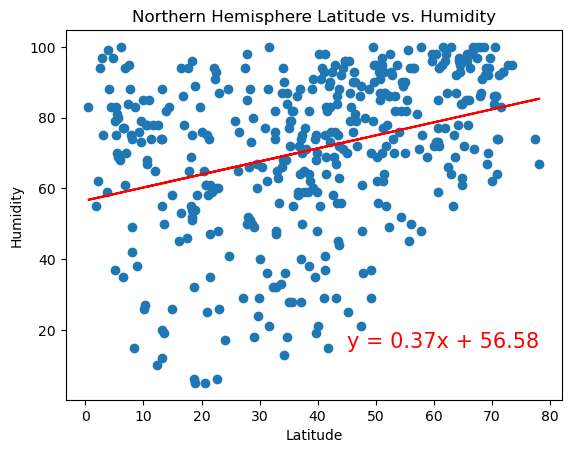

In [105]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude vs. Humidity")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.11


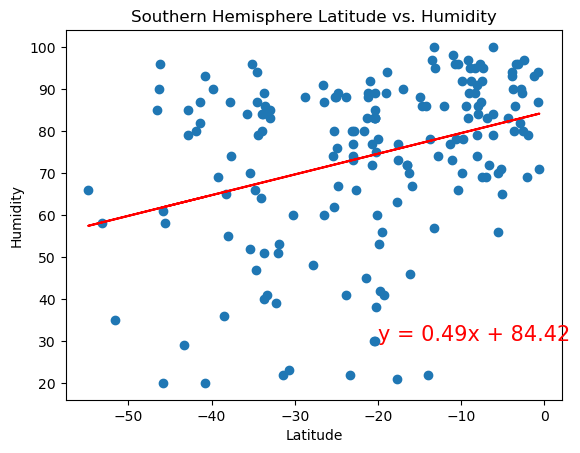

In [108]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude vs. Humidity")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** Linear relationship between Southern and Northern hemisphere, comparing latitutde and humidity, are more alike than Temperature vs Latitude. Have a more similar trend. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04


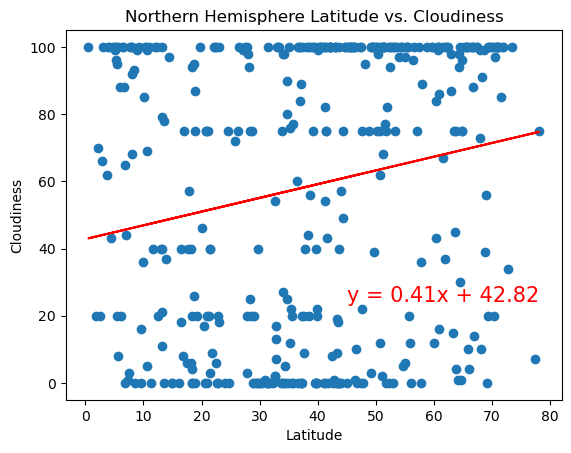

In [113]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(45,24),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.12


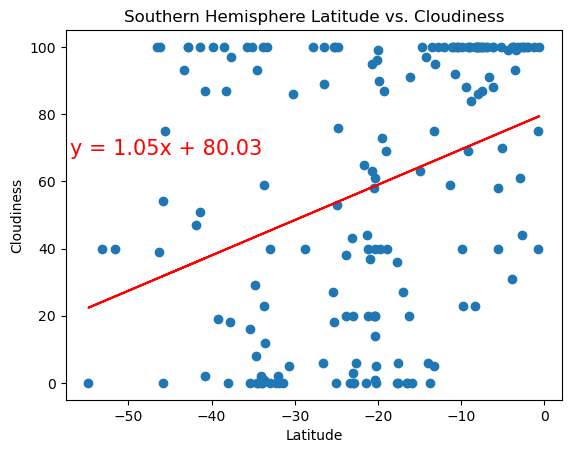

In [120]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-57,68),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03


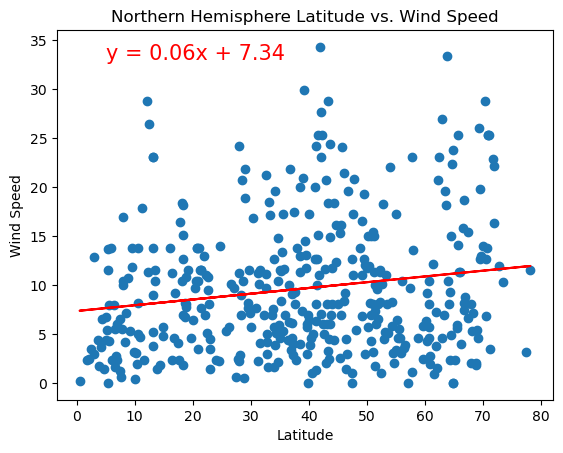

In [123]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(5,33),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.24


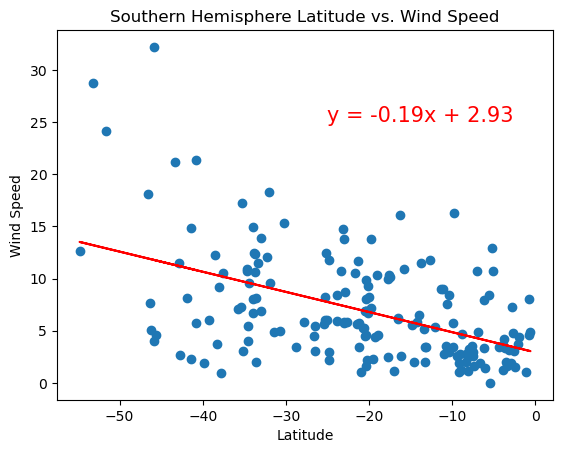

In [126]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE